In [1]:
import tensorflow as tf
import os
from datetime import datetime
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D, Lambda, GaussianNoise, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import Precision, Recall, F1Score
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def preprocess_image(image, label):
        # image = tf.image.crop_to_bounding_box(image, 0, 48, 224, 224)
        # Resize the cropped image to 160x160
        image = tf.image.resize(image, [224, 224])
        # Convert the image to grayscale
        image = tf.image.rgb_to_grayscale(image)
        # Replicate the grayscale image across three channels
        image = tf.image.grayscale_to_rgb(image)
        return tf.cast(image, tf.float32), label

Found 13793 files belonging to 17 classes.
Using 11035 files for training.


2024-03-24 17:39:20.933456: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-03-24 17:39:20.933489: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-03-24 17:39:20.933499: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-03-24 17:39:20.933803: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-24 17:39:20.934146: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-03-24 17:39:22.107860: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncat

(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)


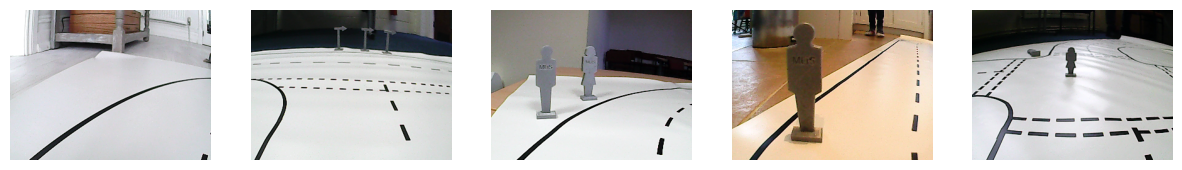

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


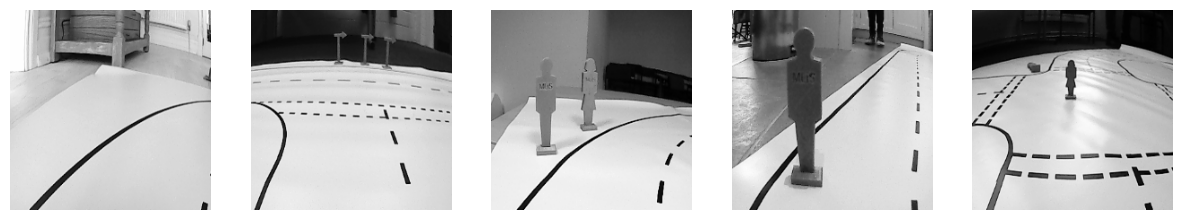

In [3]:
directory = 'angle_class_data'

# Load the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=128,
    image_size=(240, 320),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training").cache().prefetch(tf.data.AUTOTUNE)

# Take one batch from the dataset and cache it for comparison
cached_batch = None
for images, labels in train_ds.take(1):
    cached_batch = (images, labels)

# Display the first 5 images from the cached batch before preprocessing
plt.figure(figsize=(15, 15))
for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(cached_batch[0][i].numpy().astype("uint8"))
    print(cached_batch[0][i].shape)
    plt.axis("off")
plt.show()

# Apply preprocessing to the cached batch
preprocessed_images = tf.map_fn(lambda x: preprocess_image(x, None)[0], cached_batch[0], fn_output_signature=tf.float32)

# Display the first 5 images from the preprocessed batch
plt.figure(figsize=(15, 15))
for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(preprocessed_images[i].numpy().astype("uint8"))
    print(preprocessed_images[i].shape)
    plt.axis("off")
plt.show()

In [1]:
import tensorflow_addons as tfa


/Users/shayan/anaconda3/envs/my_adc/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
!pip install --quiet vit-keras

from vit_keras import vit

## Utils
### 1. Gaussian Blur
### 2. SpatialPyramidPooling
### Improvements: Restructing, ...

## Pipeline
### 1. Loading
### 2. Preprocessing (Submission files)
### 3. Augmentation
### 4. Results + Confusion Matrix

##